In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

In [2]:
# Загрузить данные из входного файла
X = np.loadtxt('5_data_clustering.txt', delimiter=',')

In [3]:
# Оцените пропускную способность X
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

In [4]:
# Кластерные данные с помощью MeanShift
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

MeanShift(bandwidth=1.3044799765090382, bin_seeding=True)

In [5]:
# Извлечь центры кластеров
cluster_centers = meanshift_model.cluster_centers_
print('\nCenters of clusters:\n', cluster_centers)


Centers of clusters:
 [[2.95568966 1.95775862]
 [7.20690909 2.20836364]
 [2.17603774 8.03283019]
 [5.97960784 8.39078431]
 [4.99466667 4.65844444]]


In [6]:
# Оценить количество кластеров
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print("\nNumber of clusters in input data =", num_clusters)


Number of clusters in input data = 5


C:\Users\nudan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


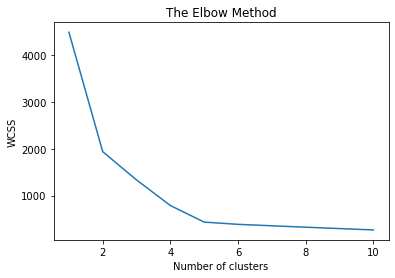

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

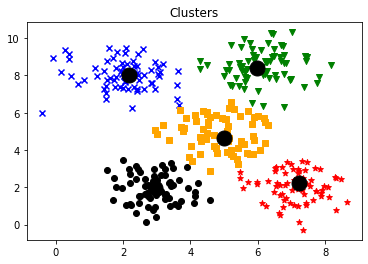

In [8]:
# Постройте точки и центры кластеров
plt.figure()
markers = 'o*xvs'
colors = ['black', 'red', 'blue', 'green', 'orange']
for i, marker, color in zip(range(num_clusters), markers, colors):
    # Plot points that belong to the current cluster
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color=color)

    # Plot the cluster center
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o', 
            markerfacecolor='black', markeredgecolor='black', 
            markersize=15)

plt.title('Clusters')
plt.show()